## Simulation of Digital Signal Processing Algorithms



The following note book is provided to simulat audio signal for the purpose of vidulaising the perfomance of 
signal processing algorithms, and techniques for time difference of arrival method.




### Author: Kananelo Chabeli

In [256]:
#Imports 
import sounddevice as sd
from scipy import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [299]:
#define a function that reads a wave file from the given file name and returns raw wave file data and sample rate
def read_wav(filename,play=False):
    rate,data=io.wavfile.read(filename)
    if play:
        sd.play(data,rate)
    return data,rate
def record_wav(filename,duration,sampling_rate,channels=1):
    recording=sd.rec(int(duration*sampling_rate),samplerate=sampling_rate,channels=channels) #record sound
    sd.wait() #wait for the recording to complete
    io.wavfile.write(filename,sampling_rate,recording)
    return recording

In [283]:
#Function that computes time axis samples for time-domain plotting
def time_axis(samples,step):
    return np.linspace(0,(samples-1)*step,int(samples))
#function that generates frequency axis samples for frequency domain plot

def freq_axis(samples,time_step):
    freq_step=1/(samples*time_step) #samples spacing in frequency domain
    if samples % 2 == 0:
       return  np.arange((-samples/2)*freq_step,((samples/2))*freq_step,freq_step)
    return np.arange((-(samples+1)/2)*freq_step,((samples-1)/2)*freq_step,freq_step)
#coming
def time_plot(t,xv,title="Time domain plot of the signal",ylab="magnitudes"):
    if len(t)!=len(xv):
        print("Given arrays must have same dimesions!")
        return
    plt.plot(t,xv)
    plt.ylabel(ylab)
    plt.title(title)
    plt.xlabel("time(s)")
    plt.show()
#coming
def spectral_plot(f,xv,time_step,title="Spectral plot of the signal",ylab="magnitude"):
    if len(f) !=len(xv):
        print("Given arrays must have same dimesions!")
        return None
    XV=np.fft.fft(xv)
    XV_Abs=time_step*np.fft.fftshift(np.abs(XV))

    plt.plot(f,XV_Abs)
    plt.title(title)
    plt.xlabel("Frequency(Hz)")
    plt.ylabel(ylab)
    plt.show()
#comming
def spectrogram_plot():
    pass

In [284]:
f0=501
sr=7.5*f0 #sampling frequency
A=20 #Amplitude
samples=10*sr #this forces the signal to have duratin of 10 seconds
t_stp=1/sr

t=time_axis(samples,δt)
#t=np.linspace(0,(samples-1)*t_stp,int(samples))
y=A*np.sin(2*np.pi*f0*t)
#time_plot(t[0:200],y[0:200])

In [285]:
f=freq_axis(samples,t_stp)
print(f.shape)
print(y.shape)
#spectral_plot(f,y,t_stp)

(37575,)
(37575,)


In [286]:
data,rate=read_wav("signal1.wav")

print(f"Size of the Array:{data.shape} and sampling rate is {rate}")

Size of the Array:(480256,) and sampling rate is 48000


In [301]:
ret=record_wav("rec2.wav",10,rate)

In [307]:
data1,rate=read_wav("rec1.wav",True)

In [303]:
print(f"Size of the Array:{data1.shape} and sampling rate is {rate}")

Size of the Array:(480000,) and sampling rate is 48000


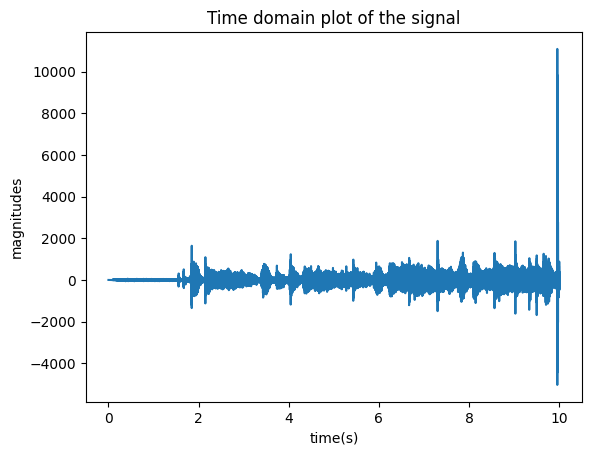

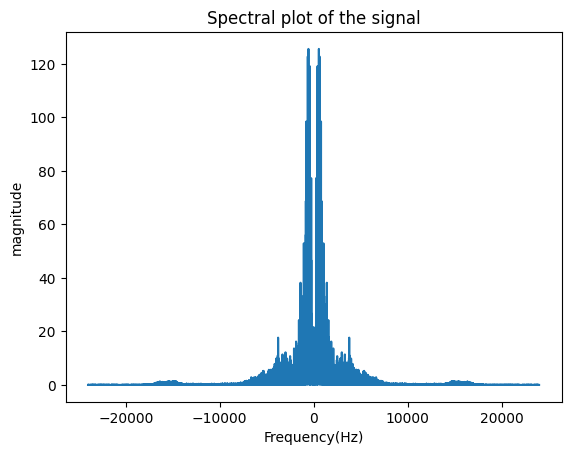

In [304]:
step=1/rate
t=time_axis(len(data),step)
time_plot(t,data)
plt.figure()
f=freq_axis(len(data),step)

spectral_plot(f,data,step)

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


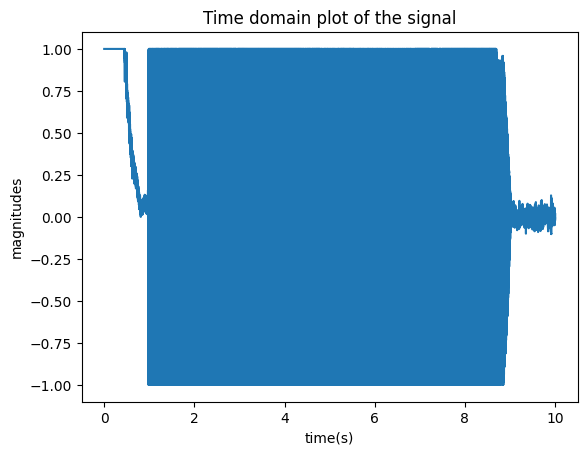

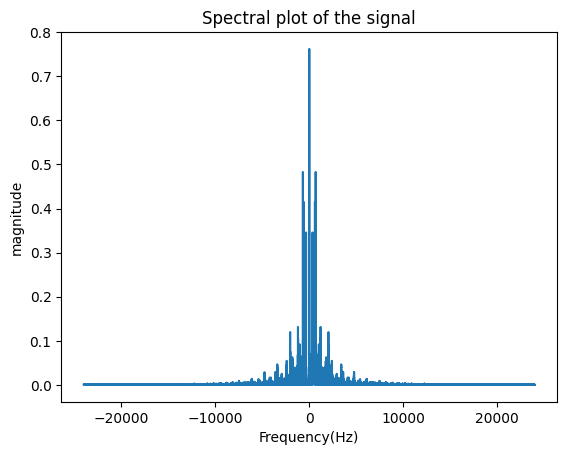

In [308]:
t=time_axis(len(data1),step)
time_plot(t,data1)
f=freq_axis(len(data1),step)
plt.figure()
spectral_plot(f,data1,step)